In [32]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_ollama import ChatOllama
#from langchain_core import PrompTemplate

In [33]:
model = ChatOllama(model="deepseek-r1:1.5b")

In [34]:
class Simplellm(TypedDict):
    question: str
    answer: str


In [35]:
def llm_qa(state: Simplellm) -> Simplellm:

    question = state['question'] 

    prompt = "answer this question in a correct way {question}"

    state['answer'] = model.invoke(prompt).content

    return state


In [36]:
# defining the graph
graph = StateGraph(Simplellm)

In [37]:
# adding nodes
graph.add_node('llm_qa',llm_qa)

In [38]:
# adding edges
graph.add_edge(START,'llm_qa')
graph.add_edge('llm_qa',END)

In [39]:
#compilling graph
workflow = graph.compile()

In [ ]:
#execute the graph
initial_state = {'question':"Name the asian cricket teams"}
final_state = workflow.invoke(initial_state)
print(final_state['answer'])

{'question': 'Name the asian cricket teams', 'answer': '<think>\nOkay, so I\'m trying to answer the question "What is 2 + 3?" Hmm, where do I even start? Well, addition is something that comes up pretty often, but I guess I should think about it step by step.\n\nFirst, I remember learning in school that when you add numbers, you combine their values. So if I have two apples and someone gives me three more, how many apples do I have in total? That makes sense because addition is just putting things together.\n\nLet\'s see, 2 plus 3. I could count out two items, maybe like blocks or coins, and then add three more. If I put those all together, how many do I have now? Let me visualize that: if I line up the two objects first, that\'s one, two. Then adding three more makes it five altogether. Yeah, that seems right.\n\nWait, could there be a different way to approach this problem? Maybe using other methods like number lines or fingers. If I start at 2 and count up three more: 3, 4, 5. That 

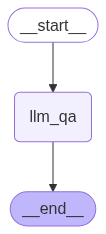

In [41]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())